In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import optbinning as opt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import mannwhitneyu ,chi2_contingency, anderson, f_oneway
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

(CVXPY) Feb 24 11:38:31 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 24 11:38:31 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
left_data=pd.read_csv("../data/application_train_vf.csv",parse_dates=["date_mensuelle"], index_col=0)

In [3]:
data=pd.read_csv("../data/bureau.csv") #

In [4]:
left_data=left_data[["SK_ID_CURR","TARGET"]]

In [5]:
data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [6]:
data.isna().mean()

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

In [7]:
data["CREDIT_ACTIVE"].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

In [8]:
(data["AMT_CREDIT_SUM_DEBT"] > 0).mean()

0.25279650530054276

In [9]:
data["CREDIT_TYPE"].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

In [10]:
data["CREDIT_ACTIVE"].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

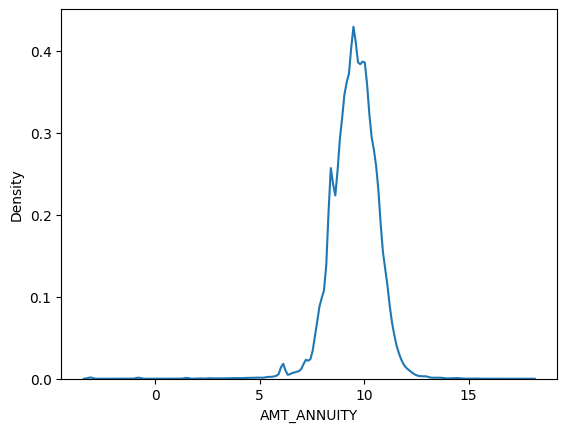

In [11]:
sns.kdeplot(data[data["CREDIT_ACTIVE"]=="Active"]["AMT_ANNUITY"].apply(np.log))
plt.show()

In [12]:
(data["AMT_CREDIT_MAX_OVERDUE"] == 0 ).mean()

0.2742031707709266

In [13]:
(data["CREDIT_DAY_OVERDUE"] >= 30).mean()

0.0014664174669721073

In [14]:
data_credit_bureau=left_data.merge(data, how='left', on="SK_ID_CURR")

In [15]:
data_credit_bureau.isna().mean()

SK_ID_CURR                0.000000
TARGET                    0.000000
SK_ID_BUREAU              0.029128
CREDIT_ACTIVE             0.029128
CREDIT_CURRENCY           0.029128
DAYS_CREDIT               0.029128
CREDIT_DAY_OVERDUE        0.029128
DAYS_CREDIT_ENDDATE       0.088092
DAYS_ENDDATE_FACT         0.389729
AMT_CREDIT_MAX_OVERDUE    0.657594
CNT_CREDIT_PROLONG        0.029128
AMT_CREDIT_SUM            0.029130
AMT_CREDIT_SUM_DEBT       0.176951
AMT_CREDIT_SUM_LIMIT      0.353551
AMT_CREDIT_SUM_OVERDUE    0.029128
CREDIT_TYPE               0.029128
DAYS_CREDIT_UPDATE        0.029128
AMT_ANNUITY               0.777940
dtype: float64

In [16]:
data_credit_bureau[["AMT_CREDIT_SUM_DEBT","AMT_CREDIT_SUM","AMT_ANNUITY"]].fillna(0, inplace=True)

In [17]:
clients_debts=data_credit_bureau[["SK_ID_CURR", "AMT_CREDIT_SUM_DEBT"]].groupby(by="SK_ID_CURR").agg(sum).reset_index()

In [18]:
clients_all_credits=data_credit_bureau.loc[data_credit_bureau["CREDIT_ACTIVE"]=="Active",["SK_ID_CURR","AMT_CREDIT_SUM"]].groupby(by="SK_ID_CURR").sum().reset_index()

In [19]:
clients_all_annuities=data_credit_bureau.loc[data_credit_bureau["CREDIT_ACTIVE"]=="Active",["SK_ID_CURR","AMT_ANNUITY"]].groupby(by="SK_ID_CURR").sum().reset_index()

In [20]:
clients_credit_actives=data_credit_bureau.loc[data_credit_bureau["CREDIT_ACTIVE"]=="Active",["SK_ID_CURR","CREDIT_ACTIVE"]].groupby(by="SK_ID_CURR").count().reset_index()

In [21]:
clients_credit_closed=data_credit_bureau.loc[data_credit_bureau["CREDIT_ACTIVE"]=="Closed",["SK_ID_CURR","CREDIT_ACTIVE"]].groupby(by="SK_ID_CURR").count().reset_index()

In [22]:
last_credit=data_credit_bureau.loc[data_credit_bureau["CREDIT_ACTIVE"]=="Active",["SK_ID_CURR","DAYS_CREDIT"]].groupby(by="SK_ID_CURR").max().reset_index()

In [23]:
end_date_last_credit=data_credit_bureau.loc[data_credit_bureau["CREDIT_ACTIVE"]=="Active",["SK_ID_CURR","DAYS_CREDIT_ENDDATE"]].groupby(by="SK_ID_CURR").max().reset_index()

In [24]:
clients_credit_actives.rename(columns={"CREDIT_ACTIVE":"NB_CREDIT_ACTIVE"}, inplace=True)
clients_credit_closed.rename(columns={"CREDIT_ACTIVE":"NB_CREDIT_CLOSED"}, inplace=True)

In [25]:
left_data=left_data.merge(clients_debts, how="left", on = "SK_ID_CURR")

In [26]:
left_data=left_data.merge(clients_credit_actives, how="left", on = "SK_ID_CURR")

In [27]:
left_data=left_data.merge(clients_credit_closed, how="left", on = "SK_ID_CURR")

In [28]:
left_data=left_data.merge(last_credit, how="left", on ="SK_ID_CURR")

In [29]:
left_data=left_data.merge(end_date_last_credit, how="left", on = "SK_ID_CURR")

In [30]:
left_data=left_data.merge(clients_all_credits, how="left", on="SK_ID_CURR")

In [31]:
left_data=left_data.merge(clients_all_annuities, how="left", on="SK_ID_CURR")

In [32]:
left_data["DAYS_CREDIT"]

0        -175.0
1        -359.0
2        -173.0
3           NaN
4        -235.0
          ...  
306102   -409.0
306103      NaN
306104      NaN
306105   -289.0
306106    -66.0
Name: DAYS_CREDIT, Length: 306107, dtype: float64

In [33]:
left_data["NB_CREDIT_ACTIVE"].fillna(0, inplace=True)
left_data["NB_CREDIT_CLOSED"].fillna(0, inplace=True)
left_data["DAYS_CREDIT"].fillna(left_data["DAYS_CREDIT"].max(), inplace=True)
left_data["AMT_CREDIT_SUM_DEBT"].fillna(0, inplace=True)
left_data["AMT_CREDIT_SUM"].fillna(0, inplace=True)

In [34]:
left_data["DAYS_CREDIT_ENDDATE"].fillna(0, inplace=True)

In [35]:
left_data["AMT_ANNUITY"].fillna(0, inplace=True)

In [36]:
left_data.drop(columns="TARGET").add_prefix("CB_").to_csv("../data/cb_findings.csv")

In [37]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [38]:
def mannwhitney_test(df:pd.DataFrame,variable:str,target:str):
    # Séparer les données en deux groupes en fonction de la variable cible
    group_1 = df[df[target] == 0]
    group_2 = df[df[target] == 1]

    stat, p_value = mannwhitneyu(group_1[variable].dropna(), group_2[variable].dropna())
    # Afficher les résultats
    print(f"Variable: {variable}")
    print(f"Mann-Whitney U-statistic: {stat}")
    print(f"P-value: {p_value}")
    print(10*"===")
    
    pass

In [39]:
mannwhitney_test(left_data,"AMT_CREDIT_SUM","TARGET")

Variable: AMT_CREDIT_SUM
Mann-Whitney U-statistic: 3272229246.5
P-value: 0.0003162306436866172


In [40]:
mannwhitney_test(left_data,"AMT_CREDIT_SUM_DEBT","TARGET")

Variable: AMT_CREDIT_SUM_DEBT
Mann-Whitney U-statistic: 3133031095.5
P-value: 5.979879521139057e-49


In [41]:
mannwhitney_test(left_data,"NB_CREDIT_CLOSED","TARGET")

Variable: NB_CREDIT_CLOSED
Mann-Whitney U-statistic: 3680612527.5
P-value: 4.6863231031874803e-175


In [42]:
mannwhitney_test(left_data,"NB_CREDIT_ACTIVE","TARGET")

Variable: NB_CREDIT_ACTIVE
Mann-Whitney U-statistic: 3123304824.5
P-value: 2.4344390971841764e-53


In [43]:
mannwhitney_test(left_data,"DAYS_CREDIT","TARGET")

Variable: DAYS_CREDIT
Mann-Whitney U-statistic: 3077426477.5
P-value: 1.5485316146462724e-78


In [44]:
mannwhitney_test(left_data,"DAYS_CREDIT_ENDDATE","TARGET")

Variable: DAYS_CREDIT_ENDDATE
Mann-Whitney U-statistic: 3110108726.0
P-value: 1.1983707194643837e-59


In [45]:
mannwhitney_test(left_data,"AMT_ANNUITY","TARGET")

Variable: AMT_ANNUITY
Mann-Whitney U-statistic: 3223333125.5
P-value: 1.2599151178089192e-32


In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

class DecisionTreeDiscretizer:
    def __init__(self, max_bins=5, target=None):
        self.tree_max_bins = max_bins
        self.clf = DecisionTreeClassifier(criterion="gini", max_depth=int(round(self.tree_max_bins/2,0)),
                                          min_samples_split=0.05,
                                           min_samples_leaf=0.05) #
        self.target = target

    def fit(self, X_train):
        # Entraîner le modèle sur les données d'entraînement
        self.clf.fit(X_train.values.reshape(-1, 1), self.target)

    def _get_tree_thresholds(self):
        thresholds = set()
        for node in range(self.clf.tree_.node_count):
            if self.clf.tree_.children_left[node] != self.clf.tree_.children_right[node]:  # non-leaf node
                feature = self.clf.tree_.feature[node]
                threshold = self.clf.tree_.threshold[node]
                thresholds.add(threshold)
        return np.array(list(thresholds))

    def get_thresholds(self):
        if hasattr(self.clf, 'tree_') and self.clf.tree_ is not None:
            thresholds_np = self._get_tree_thresholds()
            thresholds = [-np.inf] + sorted(list(set(list(thresholds_np)))) + [np.inf]
            return thresholds
        else:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant d'obtenir les seuils.")

    def transform(self, X):
        # Vérifier si le modèle est entraîné
        if not hasattr(self.clf, 'tree_') or self.clf.tree_ is None:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant de transformer les données de test.")

        thresholds = self.get_thresholds()

        # Utiliser pd.cut pour obtenir les intervalles au lieu des numéros
        intervals = pd.cut(X.values.flatten(), bins=thresholds, include_lowest=True, right=True)
        return intervals



In [47]:
discretizer=DecisionTreeDiscretizer(target=left_data["TARGET"])

In [48]:
discretizer.fit(left_data["AMT_CREDIT_SUM_DEBT"])
left_data["AMT_CREDIT_SUM_DEBT"]=discretizer.transform(left_data["AMT_CREDIT_SUM_DEBT"])

In [49]:
discretizer.fit(left_data["NB_CREDIT_CLOSED"])
left_data["NB_CREDIT_CLOSED"]=discretizer.transform(left_data["NB_CREDIT_CLOSED"])

In [50]:
discretizer.fit(left_data["NB_CREDIT_ACTIVE"])
left_data["NB_CREDIT_ACTIVE"]=discretizer.transform(left_data["NB_CREDIT_ACTIVE"])

In [51]:
discretizer.fit(left_data["DAYS_CREDIT"])
left_data["DAYS_CREDIT"]=discretizer.transform(left_data["DAYS_CREDIT"])

In [52]:
discretizer.fit(left_data["DAYS_CREDIT_ENDDATE"])
left_data["DAYS_CREDIT_ENDDATE"]=discretizer.transform(left_data["DAYS_CREDIT_ENDDATE"])

In [53]:
discretizer.fit(left_data["AMT_CREDIT_SUM"])
left_data["AMT_CREDIT_SUM"]=discretizer.transform(left_data["AMT_CREDIT_SUM"])

In [54]:
discretizer.fit(left_data["AMT_ANNUITY"])
left_data["AMT_ANNUITY"]=discretizer.transform(left_data["AMT_ANNUITY"])

In [55]:
pd.crosstab(left_data["TARGET"], left_data["NB_CREDIT_ACTIVE"])

NB_CREDIT_ACTIVE,"(-inf, 2.5]","(2.5, 4.5]","(4.5, inf]"
TARGET,,,
0,206114,54868,21642
1,15786,4896,2801


In [56]:
def calculate_information_value_from_contingency_table(contingency_table):
    """
    Calculer l'Information Value à partir d'une table de contingence.
    
    Args:
        contingency_table (pd.DataFrame): La table de contingence entre la variable et la target.
        
    Returns:
        float: L'Information Value calculé.
    """
    non_event_rate=contingency_table.iloc[0]/(contingency_table.iloc[0].sum())
    event_rate=contingency_table.iloc[1]/(contingency_table.iloc[1].sum())
    iv=0
    if (non_event_rate.min() > 0) & (event_rate.mean() >0) :
        for col in non_event_rate.index:
            iv += (event_rate[col] - non_event_rate[col])*np.log(event_rate[col] / non_event_rate[col])

    return iv

In [57]:
calculate_information_value_from_contingency_table(pd.crosstab(left_data["TARGET"], left_data["AMT_CREDIT_SUM_DEBT"]))

0.011823451774652787

In [58]:
calculate_information_value_from_contingency_table(pd.crosstab(left_data["TARGET"], left_data["NB_CREDIT_ACTIVE"]))

0.024596864229907343

In [59]:
calculate_information_value_from_contingency_table(pd.crosstab(left_data["TARGET"], left_data["NB_CREDIT_CLOSED"]))

0.04041323067338279

In [60]:
calculate_information_value_from_contingency_table(pd.crosstab(left_data["TARGET"], left_data["DAYS_CREDIT"]))

0.04707099842295452

In [61]:
calculate_information_value_from_contingency_table(pd.crosstab(left_data["TARGET"], left_data["DAYS_CREDIT_ENDDATE"]))

0.023349492570046263

In [62]:
calculate_information_value_from_contingency_table(pd.crosstab(left_data["TARGET"], left_data["AMT_CREDIT_SUM"]))

0.004261362181860707

In [63]:
calculate_information_value_from_contingency_table(pd.crosstab(left_data["TARGET"], left_data["AMT_ANNUITY"]))

0.006777156488277911